# Это продолжение HW_2_2_1

In [74]:
with open("infinity.txt", encoding='utf-8') as f:
    book = f.read()

In [51]:
! pip install wordcloud
! pip install nltk

In [95]:
import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.corpus import webtext
from nltk.probability import FreqDist
import seaborn as sns

In [75]:
tokens = [w.lower() for w in word_tokenize(book) if w.isalpha()]
m = MorphAnalyzer()
mtokens = []
for token in tokens:
    first = m.parse(token)[0]
    mtokens.append(first)

In [76]:
lemms = []
for token in morph_tokens:
    lemm = (token.word, (token.normal_form, token.tag.POS))
    lemms.append(lemm)
    
list_of_lemms = [lemm[1][0] for lemm in lemms]

Все блоки выше мы просто копипастили предыдущее задание

Теперь начинаем преобразовывать данные в датафрейм.

In [77]:
def parse(x):
    func = {'word' : x[0], 'lemm' : x.normal_form, 'POS' : x.tag.POS, 'case' : x.tag.case , 'number' : x.tag.number,
         'gender' : x.tag.gender, 'animacy' : x.tag.animacy , 'aspect' : x.tag.aspect, 
         'transitivity' : x.tag.transitivity, 'person' : x.tag.person, 
         'tense' : x.tag.tense, 'mood' : x.tag.mood, 'involvement' : x.tag.involvement, 
         'voice' : x.tag.voice}
    return func

In [78]:
table = []
for token in mtokens:
    table.append(parse(token))

Здесь мы создали список словарей для каждого слова.

In [79]:
datfr = pd.DataFrame(table)
datfr.to_csv('chto.csv', sep='\t', index=False)

Записали в файл.

Выводим ниже.

In [80]:
tablo = pd.read_csv('chto.csv', sep='\t').fillna('')
tablo.head(20)

,POS,animacy,aspect,case,gender,involvement,lemm,mood,number,person,tense,transitivity,voice,word
0,NOUN,anim,,nomn,masc,,филип,,sing,,,,,филип
1,NOUN,inan,,nomn,femn,,бесконечность,,sing,,,,,бесконечность
2,VERB,,impf,,masc,,переть,indc,sing,,past,tran,,пёр
3,,,,,,,philip,,,,,,,philip
4,,,,,,,harryfan,,,,,,,harryfan
5,,,,,,,sf,,,,,,,sf
6,,,,,,,f,,,,,,,f
7,,,,,,,laboratory,,,,,,,laboratory
8,,,,,,,fido,,,,,,,fido
9,NOUN,anim,,nomn,masc,,майор,,sing,,,,,майор


Сделаем облачко из слов.

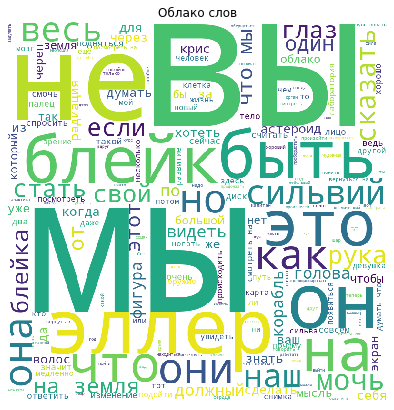

In [81]:
text = ' '.join([word for word in tablo['lemm'].values])

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

Посмотрим на графике длинну слов.

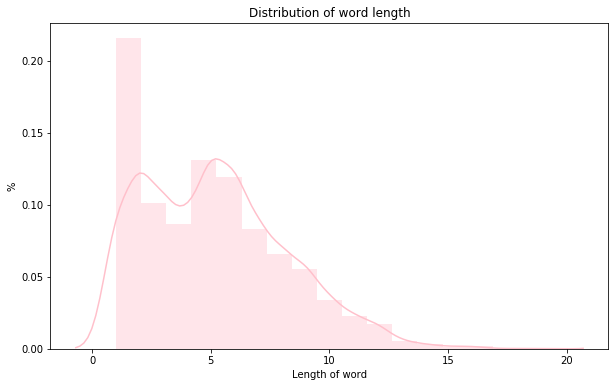

In [97]:
datfr['length'] = datfr['word'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(datfr['length'], bins=17, color='pink')
plt.title('Distribution of word length')
plt.ylabel('%')
plt.xlabel('Length of word');

График по датафрейму

### Dispersion

Возьмем имена главных героев произведения и представим частотность их употребления в виде Lexical Dispersion Plot

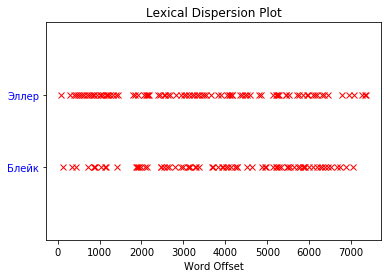

In [89]:
words = ['Блейк', 'Эллер']

with open('infinity.txt', encoding='utf-8') as f:
    text = f.read()
    token = word_tokenize(text)

points = [(x, y) for x in range(len(token))
          for y in range(len(words)) if token[x] == words[y]]
if points:
    x, y = zip(*points)
else:
    x = y = ()
 
plt.plot(x, y, "rx", scalex=.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()